<a href="https://colab.research.google.com/github/couama/AISdb/blob/master/A1_Elizabeth_Matthew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align:center;">CSCI 4146/6409 - Process of Data Science (Summer 2025)</h1>
<h2 style="text-align:center;">Assignment 1: Data Exploration</h2>

<p><b>Name:</b> Elizabeth Wiafe </p>
<p><b>  ID:</b> ______________________________________</p>

<p><b>Name:</b> Matthew Agada</p>
<p><b>  ID:</b> B00981622</p>


### Task 1: Business Understanding<a id='top'></a>


# **Business Understanding**

Identify a business problem that can be addressed using the dataset.

How can an insurance company use vehicle attribute data to optimize auto insurance pricing, risk assessment, and customer segmentation, while providing feedback to automakers to improve vehicle safety and insurability?

### **Three Potential Data Science Solutions**

#### 1) Combining public information on claims with the available data set to predict risks

This solution suggests using public safety data like crash test ratings and recall information as stand-ins for actual risk. By analyzing vehicle features such as engine power, size, year, fuel efficiency, and transmission type, a regression model can be built to predict safety scores, usually on a scale from one to five stars.
This method provides a way to estimate how safe a vehicle is based on its design, using data that is readily available. This idea is practical because the required safety data is publicly accessible, and tools like linear regression or gradient boosting can handle the analysis. The advantage is that it helps automakers design safer vehicles and allows insurers to estimate risk level i.e. cars with lower safety scores might lead to higher insurance premiums. However, this method isn't as accurate as using real-world accident claims, so the results may be more general than exact.

#### 2) Unsupervised Risk Clustering

This solution uses methods like K-means or Gaussian Mixture Models to group vehicles based on features that are linked to risk. For example, one group might include sports cars with high engine power and low fuel efficiency, which could suggest higher risk. Another group might include large vehicles with all-wheel drive and good gas mileage, indicating lower risk. These clusters can then be compared with outside data, like theft rates from insurance sources, to check if the groupings make sense.
This method is practical because it doesn’t need labeled data, making it easier to apply. The result is a set of risk levels, such as Tier 1 for the highest insurance risk. It’s useful because it reveals risk patterns without needing actual accident or claims data. Car manufacturers can use it to understand how their design decisions relate to risk. However, the downside is that someone still must interpret the results and explain why a certain group of cars is considered high-risk.

#### 3) Rule-based Risk Heuristics

This approach uses simple rules based on expert knowledge to give vehicles a risk score. For example, a car with over 300 horsepower might get two extra risk points, while one with low city mileage or a smaller size could each add another point. These points add up to show which vehicles might be riskier. Insurance companies can then focus on cars with higher scores, like those rated 5 or more, for further review or possible audits.
This method is easy to use because it doesn't need any complex computer models and can be done with basic tools like Excel or Python. It's also fast to set up and easy to explain, which helps when dealing with regulations. However, it can miss important details, such as how newer cars might have advanced safety features that reduce risk but aren't reflected in the simple scoring rules.

#### **Why Unsupervised Risk Clustering is our best option**

Unsupervised clustering is the best method among the three because it doesn’t need pre-labeled safety scores or past claims data, which makes it very flexible when that information isn’t available. It groups vehicles based on features related to risk, like engine power, theft rates, or recalls, and finds hidden patterns for example, risky combinations of horsepower and drivetrain, that simpler methods might miss. Unlike strict rule-based systems or models that rely on safety ratings, clustering can handle complex relationships between features. Later, insurers can check these groups against real claims data to make sure they match actual risk, making unsupervised clustering both practical and useful for finding risk without needing a lot of labeled data.
That said, if there is some claims data available, supervised machine learning usually works better because it learns directly from real risk results. But since we are working with the available dataset “vehicle dataset”, which is not a claims dataset, unsupervised clustering is the strongest and most flexible option.

### Success Criteria
- Group vehicles into meaningful risk categories.
- Identify key factors (e.g., horsepower, MPG) that influence risk.
- Produce visual summaries and insights from the data.

### Relevant Descriptive Features from the Dataset for Vehicle Safety Risk Tier

- **Engine Performance**
  - Engine HP
  - Cylinders
  - Fuel Type
- **Fuel Efficiency**
  - City MPG
  - Highway MPG
- **Vehicle Design**
  - Vehicle Size
  - Vehicle Style
  - Number of Doors
- **Market & Usage**
  - Market Category
  - Driven Wheels
  - Popularity


In [13]:
# Phase 2: Data Understanding
import pandas as pd

# Load the dataset
df = pd.read_csv("data.csv")

# Check structure
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# Preview data
df.head()


Shape: (11914, 16)
Columns: ['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Driven_Wheels', 'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [14]:
df.head()
max_hp = df['Engine HP'].max()
max_hp_vehicles = df[df['Engine HP'] == max_hp]
print(max_hp_vehicles[['Make', 'Market Category',  'highway MPG', 'Engine Fuel Type']])

          Make          Market Category  highway MPG  \
11362  Bugatti  Exotic,High-Performance           14   
11363  Bugatti  Exotic,High-Performance           14   
11364  Bugatti  Exotic,High-Performance           14   

                  Engine Fuel Type  
11362  premium unleaded (required)  
11363  premium unleaded (required)  
11364  premium unleaded (required)  


## Analytical Base Table (ABT) Summary

| Feature Name       | Domain Concept       | Feature Description                                                                    | Feature Type | Data Type  |
|--------------------|----------------------|----------------------------------------------------------------------------------------|--------------|------------|
| `Engine HP`        | Engine Performance   | Measures the engine's horsepower; relates to vehicle acceleration and potential risk   | Numerical    | Float      |
| `Engine Cylinders` | Engine Performance   | Number of cylinders in the engine; higher values may imply more power                  | Numerical    | Integer    |
| `Engine Fuel Type` | Engine Performance   | Type of fuel the engine uses (e.g., gasoline, diesel, electric)                        | Categorical  | String     |
| `City MPG`         | Fuel Efficiency      | Fuel efficiency in city driving conditions                                             | Numerical    | Integer    |
| `Highway MPG`      | Fuel Efficiency      | Fuel efficiency on highways                                                            | Numerical    | Integer    |
| `Vehicle Size`     | Vehicle Design       | General size category of the vehicle (e.g., Compact, Midsize)                          | Categorical  | String     |
| `Vehicle Style`    | Vehicle Design       | Design style or class (e.g., Sedan, SUV, Coupe)                                        | Categorical  | String     |
| `Number of Doors`  | Vehicle Design       | Number of passenger doors; may imply type of use                                       | Numerical    | Integer    |
| `Market Category`  | Market & Usage       | Segment the vehicle belongs to (e.g., Luxury, Sports, Hybrid)                          | Categorical  | String     |
| `Driven_Wheels`    | Market & Usage       | Which wheels are powered (e.g., FWD, RWD, AWD)                                         | Categorical  | String     |
| `Popularity`       | Market & Usage       | Count of how frequently the model appears in registrations                             | Numerical    | Integer    |
| `Year`             | Market & Usage       | Year the vehicle was manufactured; useful for inferring safety tech availability       | Numerical    | Integer    |



### Task 2: Data Exploration

a. Create a data quality report for your ABT including:

i. Completeness (missing value %)

ii. Uniqueness (duplicate detection)

iii. Consistency (data format/ logical rules)

In [15]:
# Your code here
import pandas as pd

#Completeness (missing value %)
missing_values = df.isnull().sum() / len(df) * 100
print("Missing Value Percentage:")
print(missing_values)



Missing Value Percentage:
Make                  0.000000
Model                 0.000000
Year                  0.000000
Engine Fuel Type      0.025180
Engine HP             0.579151
Engine Cylinders      0.251805
Transmission Type     0.000000
Driven_Wheels         0.000000
Number of Doors       0.050361
Market Category      31.408427
Vehicle Size          0.000000
Vehicle Style         0.000000
highway MPG           0.000000
city mpg              0.000000
Popularity            0.000000
MSRP                  0.000000
dtype: float64


In [16]:
#Uniqueness (duplicate detection)
duplicate_count = df.duplicated().sum()
print("Duplicate Count:", duplicate_count)


Duplicate Count: 715


In [17]:
#Consistency (data format/ logical rules)

# Check the data types of each column
data_types = df.dtypes
print("Data Types:")
print(data_types)

Data Types:
Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object


b. Identify quality issues and outline a data quality plan to clean and preprocess the
data.

After conducting a data quality assessment, several issues were identified in the dataset and they will be addressed to ensure valid analysis and modeling. Below are the plan ouline for each issue observed;

1. Missing values in Market category (31.40%)

   A large portion of the market category column is missing.

   Plan: This column will be dropped entirely to prevent potential bias from imputation.

2. Missing values in Number of Doors and Engine Fuel Type

   These columns have a very small percentage of missing  (under or equal to 0.05%). However, they are important feature for vehicle classification and segmentation.

   Plan: The amount of missing data is minimal, so, the row with the missing values will be drooped.

3.  Missing Values in Engine HP and Engine Cylinders
  The values in these column are critical indicators of vehicle performance. The proportion of missing values is less than 1%.

  Plan: Missing values will be imputed using the median. The median because it better reflects the central tendency and also more robust to outliers.

4. Duplicate records (715 rows)

   Duplicate entries can distort summary statistics, and also introduce bias model training.

  Plan: All duplicate rows will be removed to endure uniqueness and meaningful records.



### Task 3: Data Preparation

Implement your data quality plan and preprocess the dataset accordingly.

In [18]:
#Applying the cleaning steps

#Drop the Market Category because it has over 31% missing data
df = df.drop('Market Category', axis=1)


#Drop rows with missing values in Number of Doors and Engine Fuel Type
df = df.dropna(subset=['Number of Doors', 'Engine Fuel Type'])

# Impute missing values in Engine HP and Engine Cylinders with the median
#Imputing the median for for Engine HP
df['Engine HP'] = df['Engine HP'].fillna(df['Engine HP'].median())

#Imputing the median for Engine Cylinders
df['Engine Cylinders'] = df['Engine Cylinders'].fillna(df['Engine Cylinders'].median())


#Remove duplicate rows to ensure car entry is unique
df = df.drop_duplicates()


#Running the codes to verify if the cleaning worked
#Checking for missing values
print("Remaining missing values per column:")
print(df.isnull().sum())

#Checking for duplicates
print("Duplicate Count:", df.duplicated().sum())

#Previewing the cleaned dataset
df.head()



Remaining missing values per column:
Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64
Duplicate Count: 0


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


### Task 4: Data Insights

a. Compute summary statistics and create visualizations (e.g., histograms, box
plots, scatter plots) to illustrate data distributions and relationships.


 Numberic Summary Statistics:
               Year    Engine HP  Engine Cylinders  Number of Doors  \
count  11914.000000  11845.00000      11884.000000     11908.000000   
mean    2010.384338    249.38607          5.628829         3.436093   
std        7.579740    109.19187          1.780559         0.881315   
min     1990.000000     55.00000          0.000000         2.000000   
25%     2007.000000    170.00000          4.000000         2.000000   
50%     2015.000000    227.00000          6.000000         4.000000   
75%     2016.000000    300.00000          6.000000         4.000000   
max     2017.000000   1001.00000         16.000000         4.000000   

        highway MPG      city mpg    Popularity          MSRP  
count  11914.000000  11914.000000  11914.000000  1.191400e+04  
mean      26.637485     19.733255   1554.911197  4.059474e+04  
std        8.863001      8.987798   1441.855347  6.010910e+04  
min       12.000000      7.000000      2.000000  2.000000e+03  
25%      

<Figure size 1200x800 with 0 Axes>

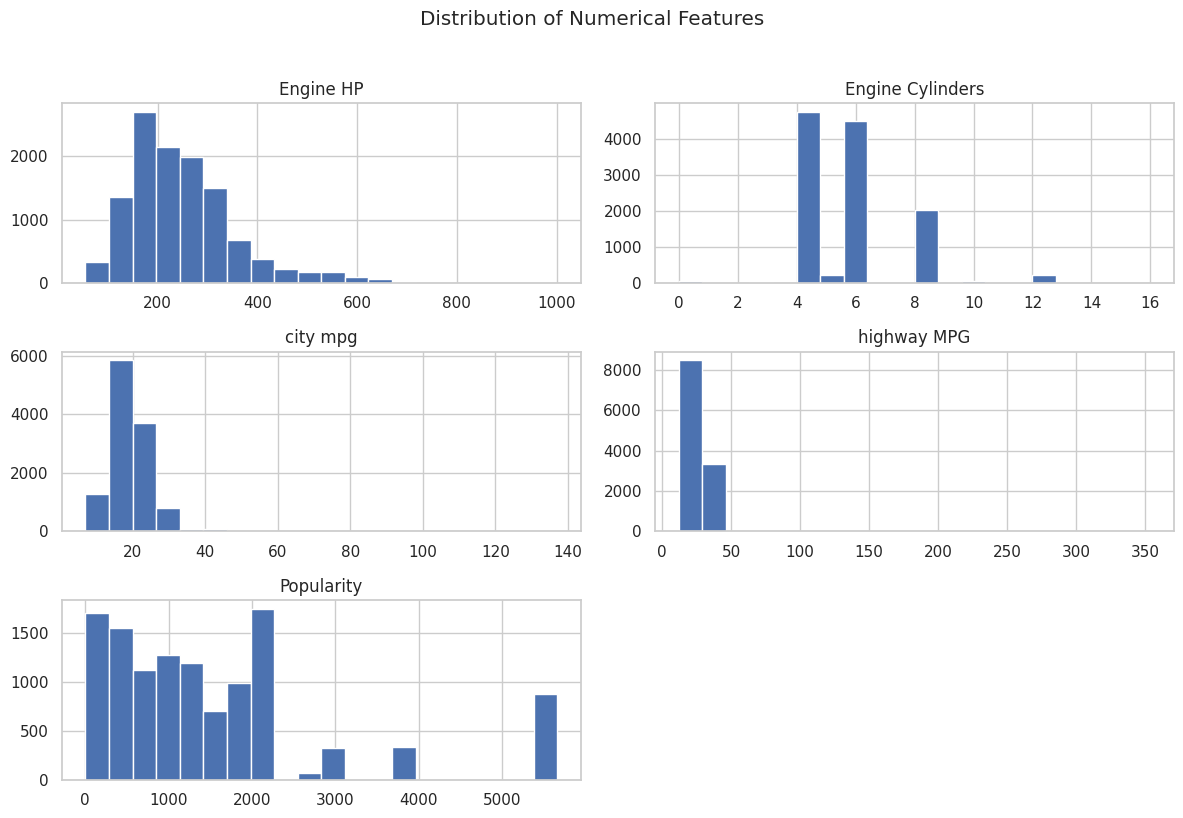

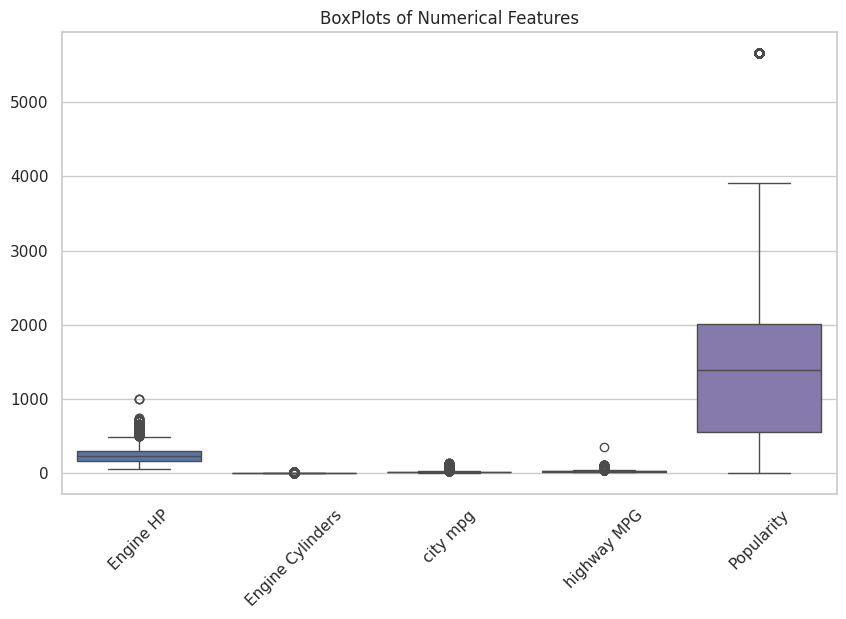

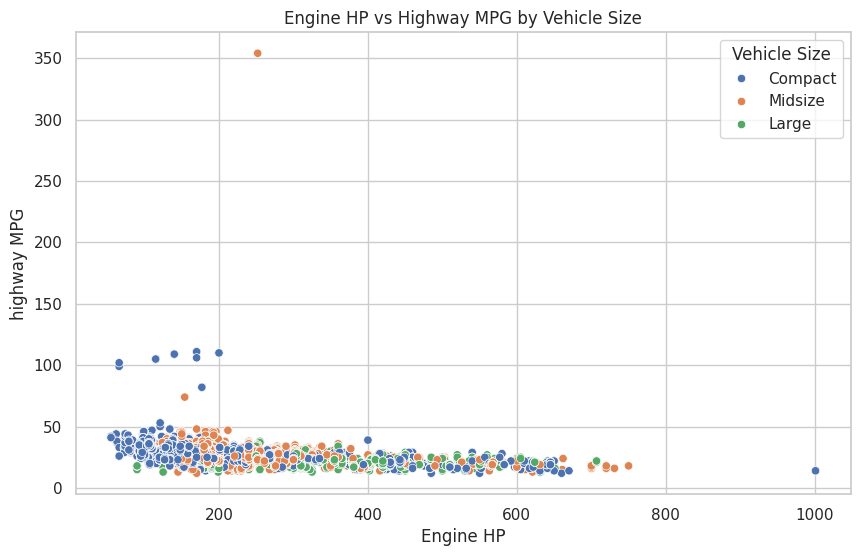

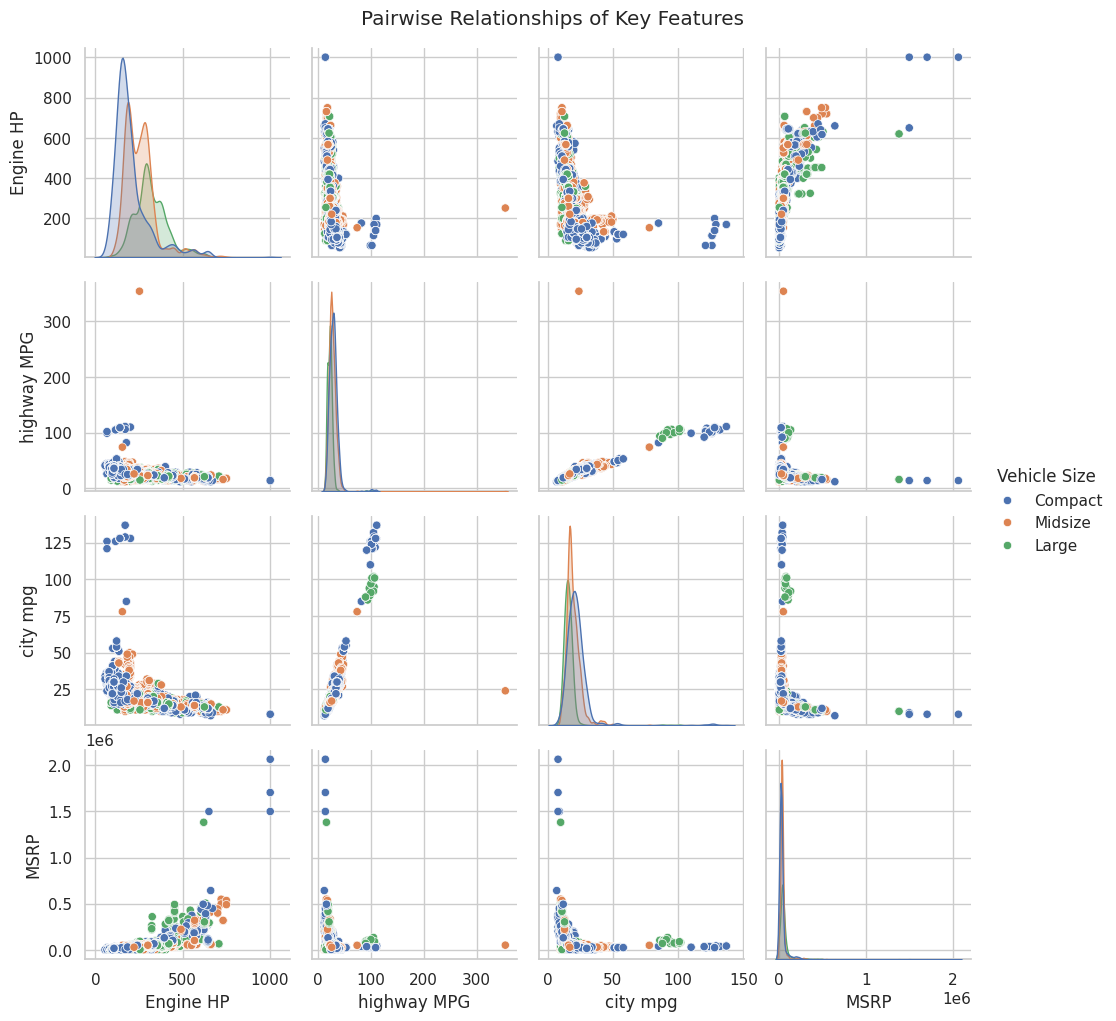

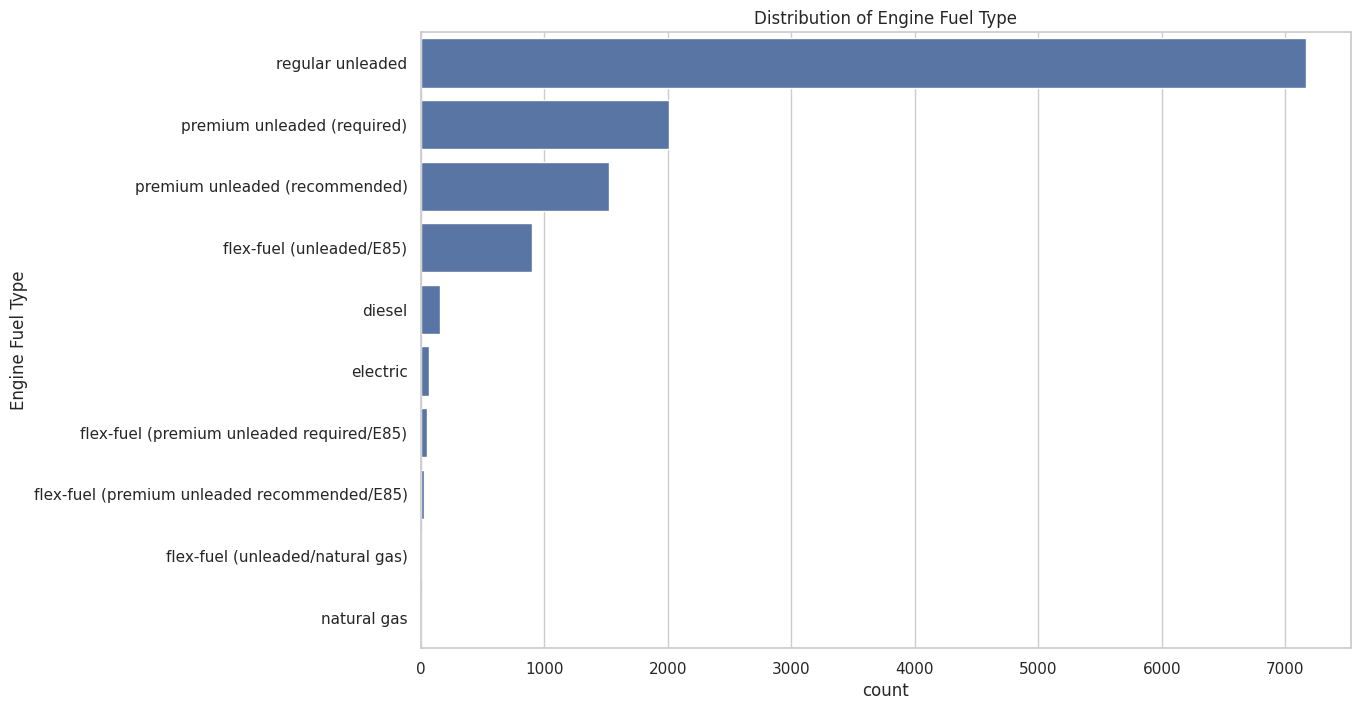

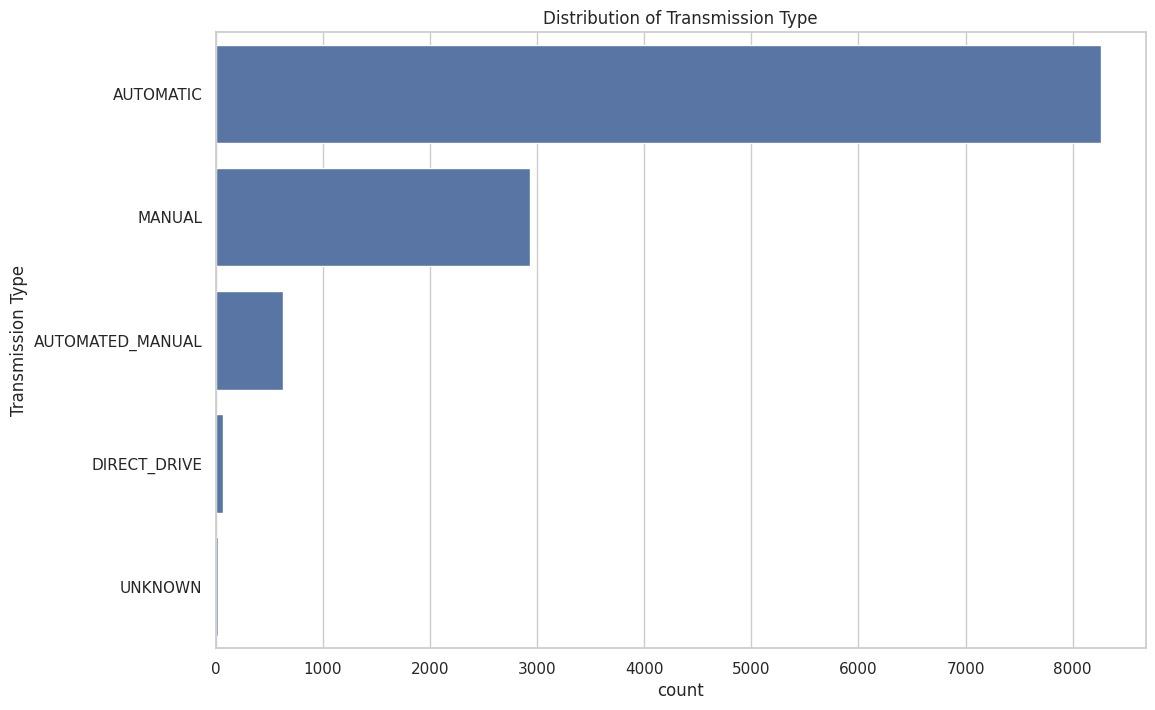

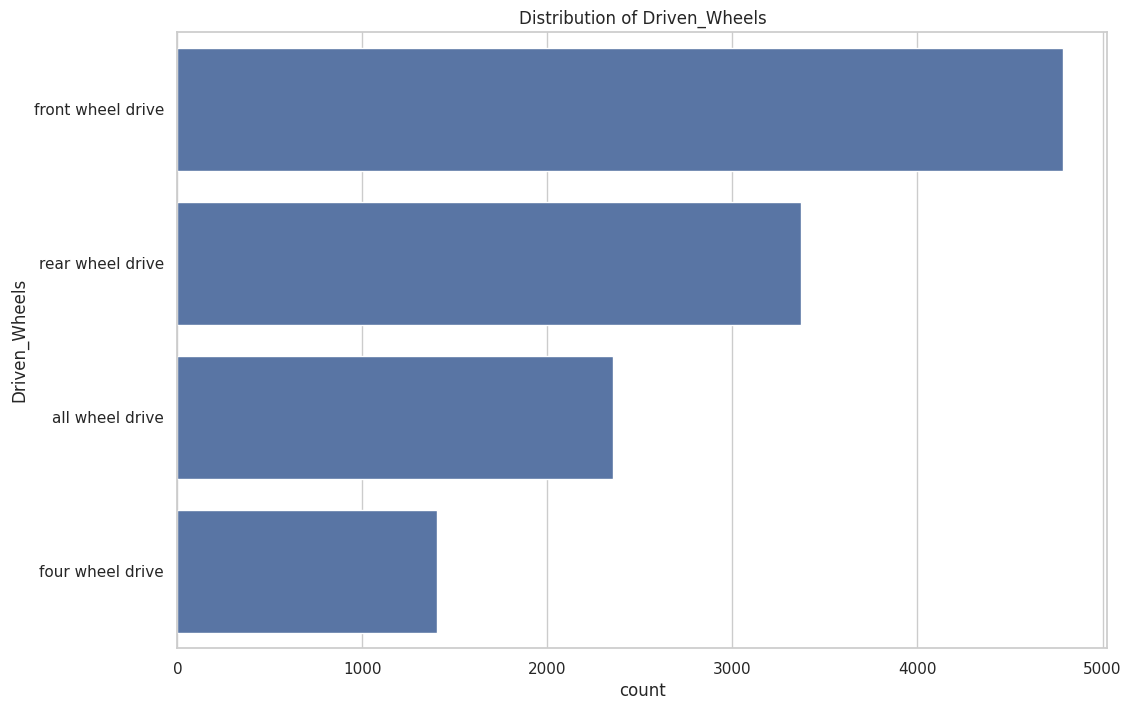

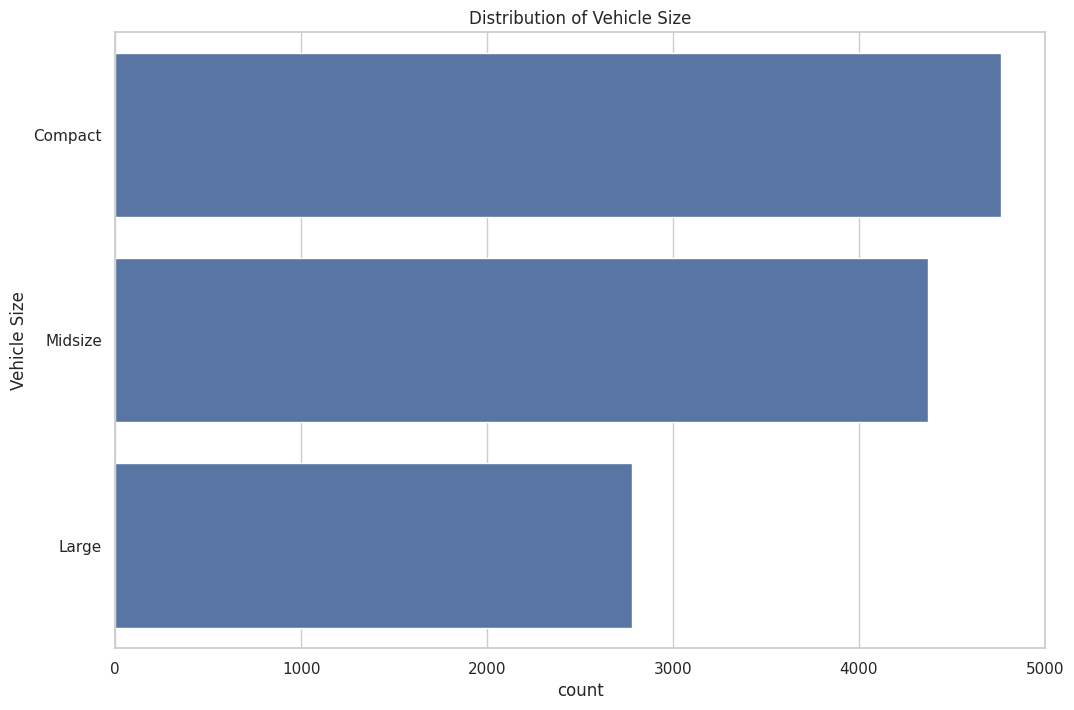

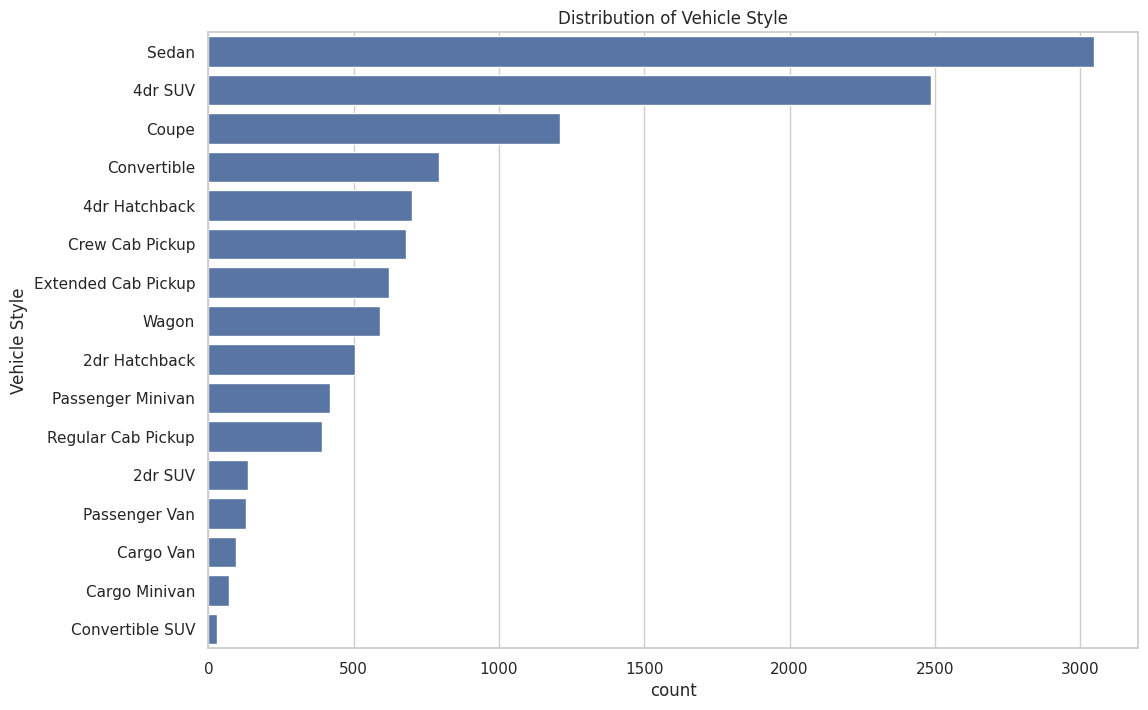

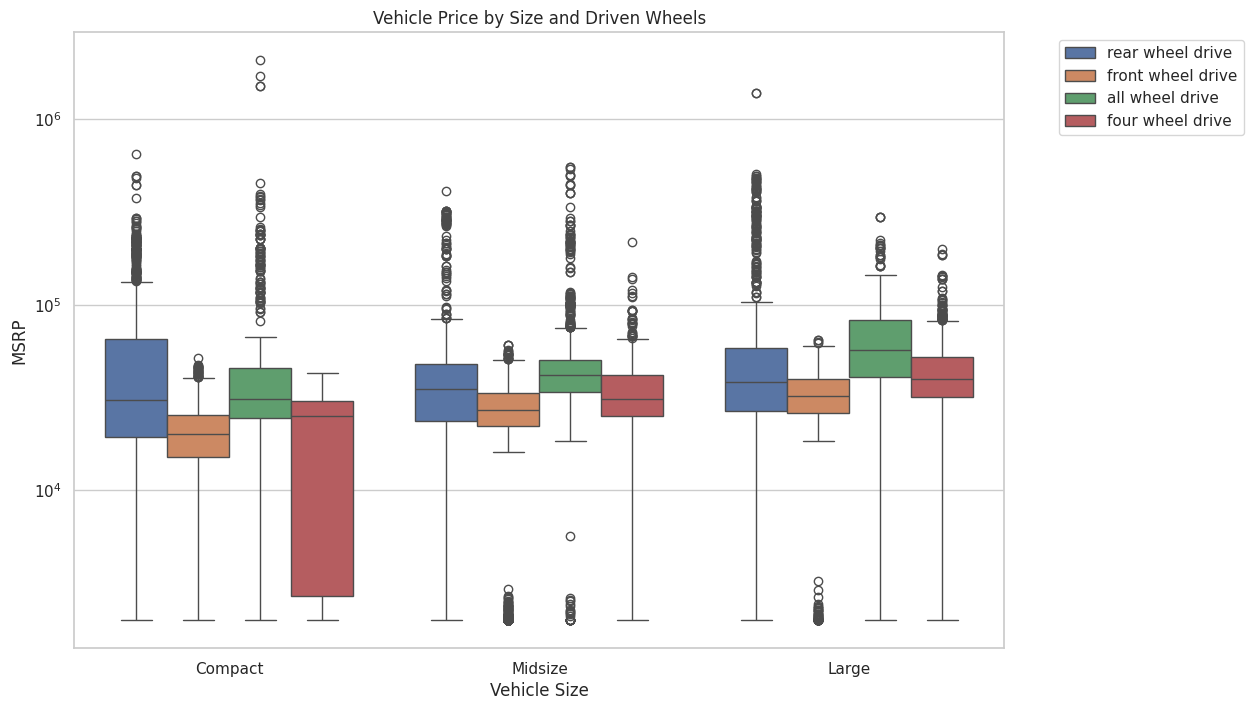

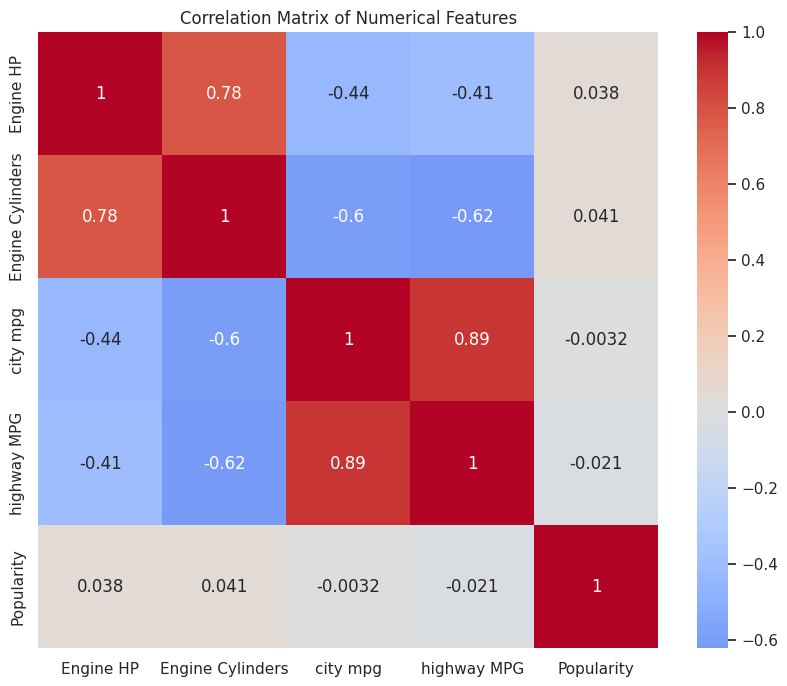

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv("data.csv")

# Set styles for visualization
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))

#1 Summarry statistics
summary_stats = df.describe()
print("\n Numberic Summary Statistics:")
print(summary_stats)

print("\n Categorical Summary Statistics:")
categorical_stats = df.describe(include=['object'])
print(categorical_stats)

# 2 Distribution Visualization.
# Histogram for numberical features
num_cols = ['Engine HP', 'Engine Cylinders', 'city mpg', 'highway MPG', 'Popularity']
df[num_cols].hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribution of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()

# Each of the prints with empty statements are meant for better visibility.
# additional layer of clarity to the viewer

print("\n")
# Boxplots for Numerical features
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[num_cols])
plt.title('BoxPlots of Numerical Features')
plt.xticks(rotation=45)
plt.show()

print("\n")
# 3. Relationship Visualizations
# Scatter plot: Engine HP vs MPG
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engine HP', y='highway MPG', hue='Vehicle Size', data=df)
plt.title('Engine HP vs Highway MPG by Vehicle Size')
plt.show()

print("\n")
# Pairplot for key numerical features
sns.pairplot(df[['Engine HP', 'highway MPG', 'city mpg', 'MSRP', 'Vehicle Size']], hue='Vehicle Size', diag_kind='kde')
plt.suptitle('Pairwise Relationships of Key Features', y=1.02)
plt.show()

print("\n")
# 4. Categorical Analysis
# Count plots for categorical features
cat_cols = ['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']
for col in cat_cols:
  plt.figure(figsize=(12, 8))
  sns.countplot(y=col, data=df, order=df[col].value_counts().index)
  plt.title(f'Distribution of {col}')
  plt.show()

print("\n")
# 5. Price Analysis
plt.figure(figsize=(12, 8))
sns.boxplot(x='Vehicle Size', y='MSRP', hue='Driven_Wheels', data=df)
plt.title('Vehicle Price by Size and Driven Wheels')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

print("\n")
# 6. Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


b. Analyze these results to derive initial insights about the data. Highlight interesting
patterns or trends.

Average Engine HP by Vehicle Size:
Vehicle Size
Large      317.789014
Midsize    254.856881
Compact    204.645270
Name: Engine HP, dtype: float64

Fuel Efficiency by Engine Cylinders:
                    city mpg  highway MPG
Engine Cylinders                         
0.0               111.196429    99.267857
3.0                32.033333    38.666667
4.0                23.849327    31.504209
5.0                19.191111    26.657778
6.0                17.057697    23.880820
8.0                14.130970    20.082718
10.0               12.544118    20.014706
12.0               11.247826    17.730435
16.0                8.000000    14.000000

Price Statistics by Vehicle Style:
                      count          mean            std      min       25%  \
Vehicle Style                                                                 
2dr Hatchback         506.0  16867.713439   10218.412168   2000.0   2712.00   
2dr SUV               138.0  10115.188406   13155.084857   2000.0   2000.00   
4d

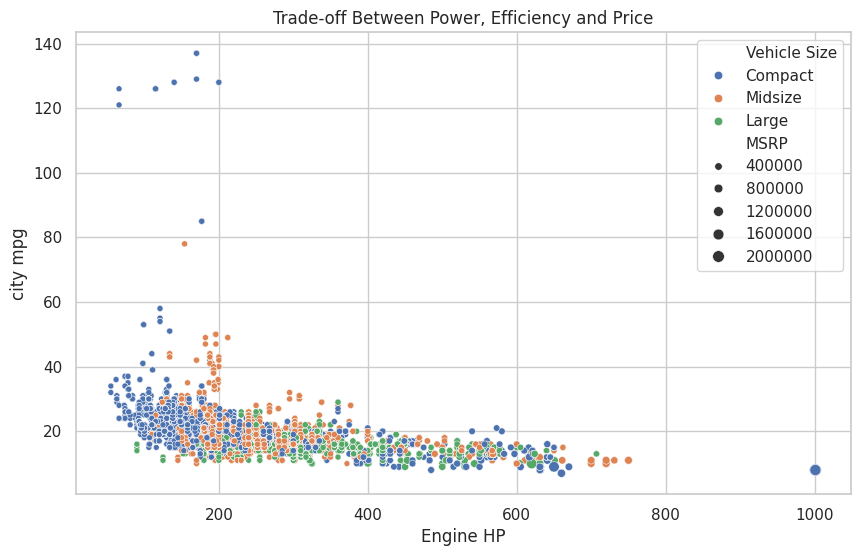

In [22]:
# Analysis Code with Insights as Comments

# 1. Engine Performance Analysis
print("Average Engine HP by Vehicle Size:")
print(df.groupby('Vehicle Size')['Engine HP'].mean().sort_values(ascending=False))

# Insight: Larger vehicles tend to have higher horsepower, which may correlate with higher risk

# 2. Fuel Efficiency Analysis
print("\nFuel Efficiency by Engine Cylinders:")
print(df.groupby('Engine Cylinders')[['city mpg', 'highway MPG']].mean())

# Insight: More cylinders generally mean lower MPG, suggesting a trade-off between power and efficiency

# 3. Price Distribution Analysis
print("\nPrice Statistics by Vehicle Style:")
print(df.groupby('Vehicle Style')['MSRP'].describe())

# Insight: Convertibles and luxury vehicles have the highest price variability

# 4. Popularity Analysis
print("\nMost Popular Vehicle Makes:")
print(df.groupby('Make')['Popularity'].sum().sort_values(ascending=False).head(10))

# Insight: Popular brands may have different risk profiles due to different usage patterns

# 5. Safety-Related Patterns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engine HP', y='city mpg', hue='Vehicle Size', size='MSRP', data=df)
plt.title('Trade-off Between Power, Efficiency and Price')
plt.show()

# Visual Insight: There's a clear inverse relationship between engine power and fuel efficiency
# Larger, more expensive vehicles tend to be in the high-power, low-efficiency quadrant


c. Propose hypotheses that could be tested in further studies based on your
analysis. Justify their relevance to the business problem and explain the value of
testing them.

Hypothesis 1: Vehicles with above average horsepower have significantly higher claim frequency.
Business Value: This feature could be used to justify premium adjustments for high-performance vehicles.

Hypothesis 2: Different engine fuel types (regular, premium, diesel) have different risk profiles.
Business Value: This feature could enable a more granular pricing based on fuel type.

Hypothesis 3: Larger vehicles (SUVs, trucks) have higher claim severity but lower frequency.
Business Value: This is important for projections and for setting appropriate reserves and pricing.

Hypothesis 4: More popular vehicle models have lower claim rates due to better driver familiarity.
Business Value: This could be used to justify discounts for popular models.

Hypothesis 5: Vehicles with better city MPG have lower claim rates in urban areas.
Business Value: This could enable usage-based pricing models. 



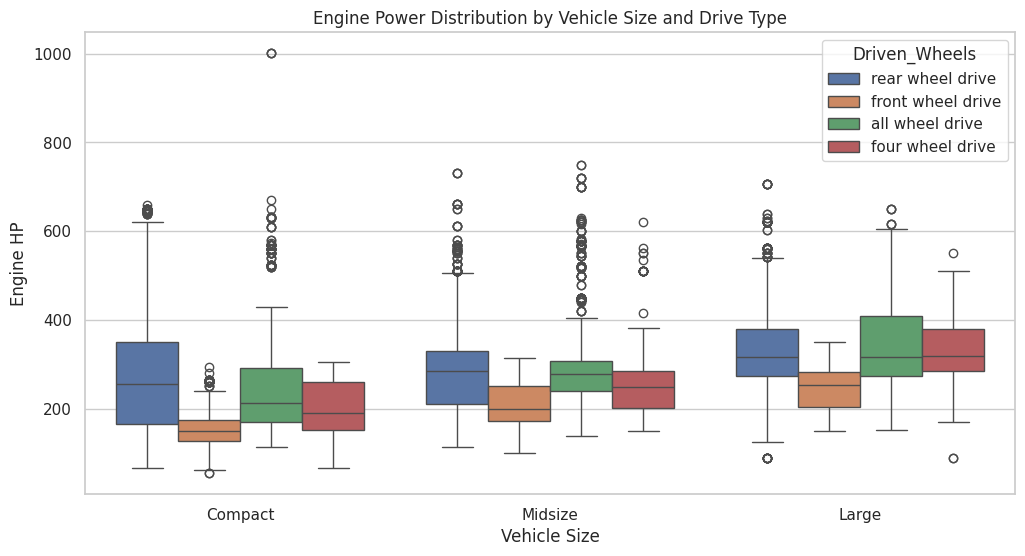


Potential Insight from Visualization:
All-wheel drive vehicles tend to have higher horsepower across all size categories,which may represent a distinct risk profile worth investigating.


In [31]:
# Hypothesis Testing Framework with Business Justification

# Hypothesis 1: Higher horsepower vehicles have more claims
print("Hypothesis 1: Vehicles with above average horsepower have significantly higher claim frequency.")
print("Business Value: This feature could be used to justify premium adjustments for high-performance vehicles.")

# Hypothesis 2: Fuel type affects risk profile
print("\nHypothesis 2: Different engine fuel types (regular, premium, diesel) have different risk profiles.")
print("Business Value: This feature could enable a more granular pricing based on fuel type.")

# Hypothesis 3: Vehicle size correlates with claim severity
print("\nHypothesis 3: Larger vehicles (SUVs, trucks) have higher claim severity but lower frequency.")
print("Business Value: This is important for projections and for setting appropriate reserves and pricing.")

# Hypothesis 4: Popularity affects risk
print("\nHypothesis 4: More popular vehicle models have lower claim rates due to better driver familiarity.")
print("Business Value: This could be used to justify discounts for popular models.")

# Hypothesis 5: MPG affects risk
print("\nHypothesis 5: Vehicles with better city MPG have lower claim rates in urban areas.")
print("Business Value: This could enable usage-based pricing models. \n")

# Visualization to support hypothesis generation
plt.figure(figsize=(12, 6))
sns.boxplot(x='Vehicle Size', y='Engine HP', hue='Driven_Wheels', data=df)
plt.title('Engine Power Distribution by Vehicle Size and Drive Type')
plt.show()

print("\nPotential Insight from Visualization:")
print("All-wheel drive vehicles tend to have higher horsepower across all size categories,which may represent a distinct risk profile worth investigating.")
